# 🎬 Exploratory Data Analysis on Enriched Movie Metadata

In this notebook, we explore the movie dataset (from [MovieLens 1M Dataset](https://grouplens.org/datasets/movielens/1m/)) enriched with metadata retrieved from [TMDb](https://www.themoviedb.org). Our goal is to assess the quality, completeness, and characteristics of the available information such as genres, overview length, ratings, popularity scores, and release timelines. This enriched dataset serves as the foundation for our content-based recommender system.

---

## ⚙️ 1. Setup & Libraries
We begin by importing required packages and setting up a consistent plotting style.

### 🧩 Setup

In [1]:
# 📦 Import core libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

In [2]:
# 📊 Set plot styles
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("Set2")

## 📥 2. Load Dataset

We now load the enriched metadata CSV generated from the [TMDb](https://www.themoviedb.org) enrichment pipeline.

- The dataset includes: `title`, `genres`, `overview`, `popularity`, `vote_average`, `release_date`, etc.
- It is stored in: `data/processed/enriched_movies.csv` (from root of the project)

In [3]:
# 📥 Load Data
df = pd.read_csv("../data/processed/enriched_movies.csv")
print(f"✅ Movies loaded: {len(df)}")
df.head()


✅ Movies loaded: 3755


,movieId,genres,overview,popularity,poster_path,release_date,title,tmdb_id,vote_average
0,6,"['Action', 'Crime', 'Thriller']",The Public Enemy battle The Gangstas in a Stee...,0.2205,/4miPIzrKBaSznoTBv1bS0sZwoMG.jpg,1995-07-15,Heat (1995),706330,0.000
1,34,"[""Children's"", 'Comedy', 'Drama']",Babe is a little pig who doesn't quite know hi...,4.5272,/zKuQMtnbVTz9DsOnOJmlW71v4qH.jpg,1995-07-18,Babe (1995),9598,6.244
2,50,"['Crime', 'Thriller']","Held in an L.A. interrogation room, Verbal Kin...",7.9936,/rWbsxdwF9qQzpTPCLmDfVnVqTK1.jpg,1995-07-19,"Usual Suspects, The (1995)",629,8.175
3,1,"['Animation', ""Children's"", 'Comedy']","Led by Woody, Andy's toys live happily in his ...",21.8546,/uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg,1995-11-22,Toy Story (1995),862,7.968
4,2,"['Adventure', ""Children's"", 'Fantasy']",When siblings Judy and Peter discover an encha...,3.1183,/vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg,1995-12-15,Jumanji (1995),8844,7.237


In [4]:
df.dtypes

movieId           int64
genres           object
overview         object
popularity      float64
poster_path      object
release_date     object
title            object
tmdb_id           int64
vote_average    float64
dtype: object

## 🧹 3. Preprocessing

Before performing visual analysis, we apply basic preprocessing to ensure consistency across key fields. Specifically:

- We extract the `release_year` from the release_date column.

In [5]:
# 📆 Convert release date to datetime and extract year
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year

In addition to parsing release years, we engineered a few auxiliary features:

- Parsed the `genres` column from string to list format.
- Counted the number of genres assigned to each movie.
- Computed the `overview_length` to capture the description length per title.

In [6]:
# 🧠 Normalize genres (convert from string list to real list)
df['genres'] = df['genres'].apply(lambda x: eval(x) if isinstance(x, str) else [])
df['n_genres'] = df['genres'].apply(len)

# 📝 Calculate overview length
df['overview_length'] = df['overview'].fillna('').apply(len)

In [7]:
df.head()

,movieId,genres,overview,popularity,poster_path,release_date,title,tmdb_id,vote_average,release_year,n_genres,overview_length
0,6,"[Action, Crime, Thriller]",The Public Enemy battle The Gangstas in a Stee...,0.2205,/4miPIzrKBaSznoTBv1bS0sZwoMG.jpg,1995-07-15,Heat (1995),706330,0.000,1995.0,3,290
1,34,"[Children's, Comedy, Drama]",Babe is a little pig who doesn't quite know hi...,4.5272,/zKuQMtnbVTz9DsOnOJmlW71v4qH.jpg,1995-07-18,Babe (1995),9598,6.244,1995.0,3,383
2,50,"[Crime, Thriller]","Held in an L.A. interrogation room, Verbal Kin...",7.9936,/rWbsxdwF9qQzpTPCLmDfVnVqTK1.jpg,1995-07-19,"Usual Suspects, The (1995)",629,8.175,1995.0,2,409
3,1,"[Animation, Children's, Comedy]","Led by Woody, Andy's toys live happily in his ...",21.8546,/uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg,1995-11-22,Toy Story (1995),862,7.968,1995.0,3,303
4,2,"[Adventure, Children's, Fantasy]",When siblings Judy and Peter discover an encha...,3.1183,/vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg,1995-12-15,Jumanji (1995),8844,7.237,1995.0,3,395


In [8]:
df.dtypes

movieId                     int64
genres                     object
overview                   object
popularity                float64
poster_path                object
release_date       datetime64[ns]
title                      object
tmdb_id                     int64
vote_average              float64
release_year              float64
n_genres                    int64
overview_length             int64
dtype: object

## 📊 4. Visual Exploration of Metadata

Now that we’ve cleaned and enriched the movie dataset with TMDb metadata, we proceed to explore key variables to gain insights into distribution patterns, potential outliers, and modeling implications.

### 📏  4.1 Overview Length Distribution

To understand the richness of textual descriptions available for each movie, we analyze the distribution of `overview_length` (i.e., the number of characters per movie overview).

This gives insight into:
- The average amount of text per movie (for TF-IDF or embedding-based models).
- Possible outliers or overly short entries that may lack useful metadata.

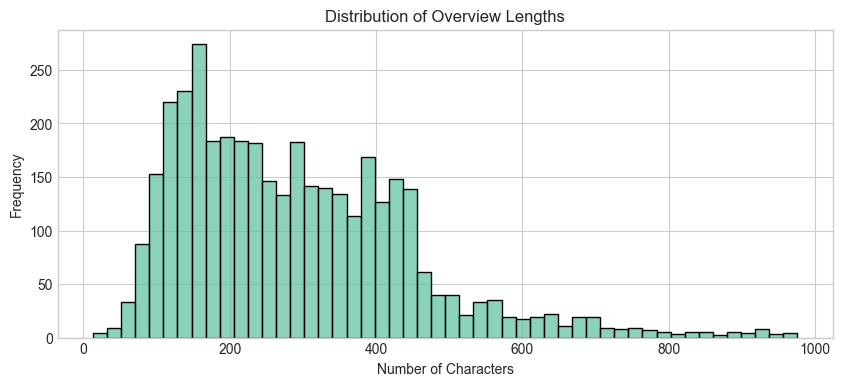

In [9]:
# 📊 Overview Length Analysis
plt.figure(figsize=(10,4))
sns.histplot(df['overview_length'], bins=50)
plt.title("Distribution of Overview Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

🔍 Most movies have overviews between 100 and 400 characters. This indicates that the dataset is rich enough in textual metadata for content-based filtering.

### 🎭 4.2 Movie Genre Frequency

We first investigate the **distribution of movie genres** across the enriched dataset. Since each movie can belong to multiple genres, we flatten the list and count individual occurrences.

In [10]:
# 📊 Genre Analysis
flat_genres = [g for sublist in df['genres'] for g in sublist]
genre_counts = Counter(flat_genres)

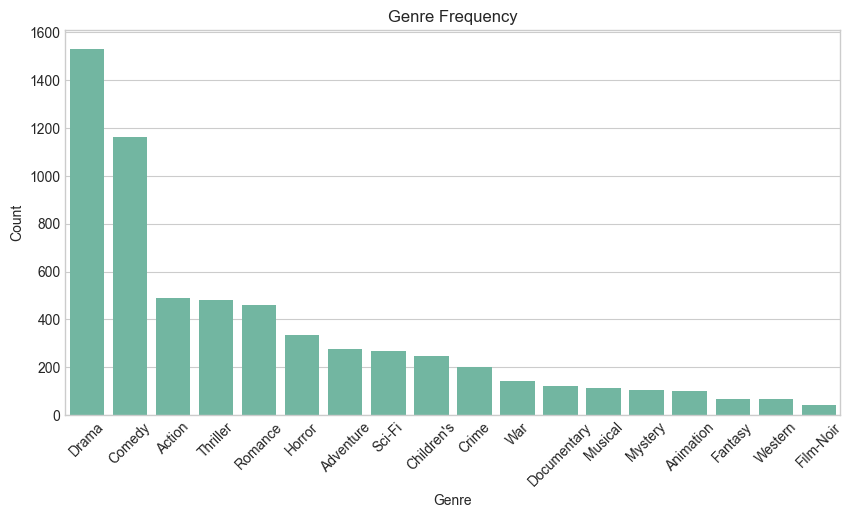

In [11]:
# 🎭 Genre Frequency Plot
genre_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['count']).sort_values('count', ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=genre_df.index, y=genre_df['count'])
plt.title("Genre Frequency")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.xlabel("Genre")
plt.show()

Key takeaways:

- **Drama** and **Comedy** are the most frequent genres.
- Genres like **Western** or **Film-Noir** are much rarer and may be underrepresented in the recommendations.

### ⭐ 4.3 Vote Average Distribution

The `vote_average` field reflects the **TMDb average user rating** per movie (typically from 0 to 10).

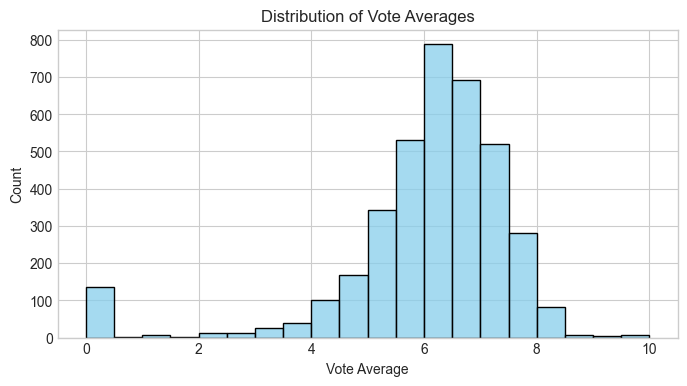

In [12]:
# 📊 Rating Distribution
plt.figure(figsize=(8,4))
sns.histplot(df['vote_average'], bins=20, color='skyblue')
plt.title("Distribution of Vote Averages")
plt.xlabel("Vote Average")
plt.ylabel("Count")
plt.show()

Observations:

- The distribution is **normally shaped**, centered around 6–7.
- There are a few perfect 10s and some extreme low scores, which may warrant further filtering or normalization.


### 📈 4.4 Popularity Score Distribution

The `popularity` metric from TMDb aggregates multiple engagement signals such as:

- Page views
- Search frequency
- Trending momentum
- Vote count (indirectly)
- Social activity

Unlike `vote_average`, this score is **not bounded between 0 and 10** and has **no upper limit**. It’s designed as an internal relevance score that reflects visibility and attention across the platform.

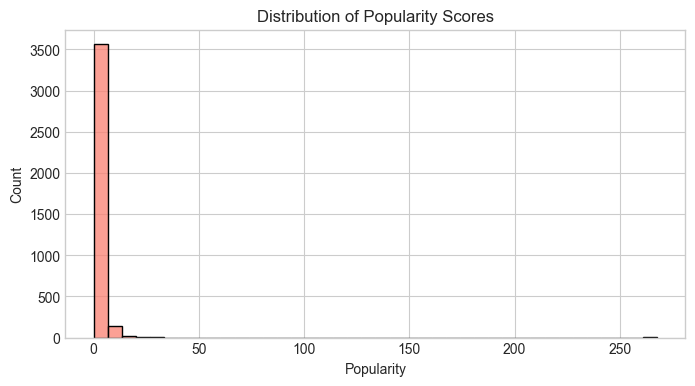

In [13]:
# 📊 Popularity Distribution
plt.figure(figsize=(8,4))
sns.histplot(df['popularity'], bins=40, color='salmon')
plt.title("Distribution of Popularity Scores")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

Insights:

- The distribution is **heavily right-skewed**, meaning the majority of movies have **very low popularity**, while only a few have exceptionally high values.
- This is consistent with real-world dynamics — most movies receive modest attention, while a small subset (blockbusters or trending releases) dominates visibility.
- **Important**: This skew can bias models if not handled carefully. Consider applying **log transformation** or **quantile binning** when using popularity as a feature in a recommendation model.

**Further Exploration**:

We may try to visualize it on a log scale to better inspect the right tail:

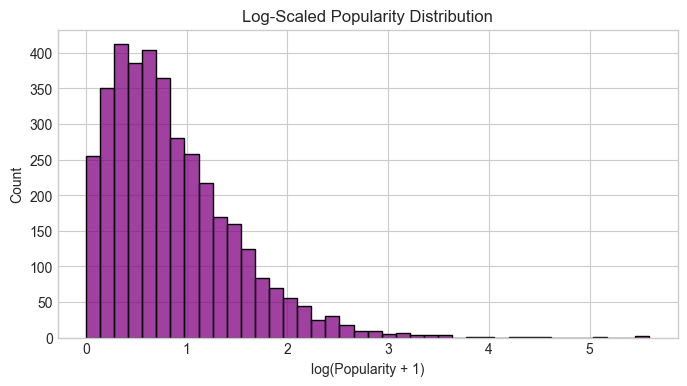

In [14]:
plt.figure(figsize=(8,4))
sns.histplot(np.log1p(df['popularity']), bins=40, color='purple')
plt.title("Log-Scaled Popularity Distribution")
plt.xlabel("log(Popularity + 1)")
plt.ylabel("Count")
plt.show()

### 📅 4.5 Movies Released per Year

We extract the year from the `release_date` field and visualize the **volume of movies by release year**.

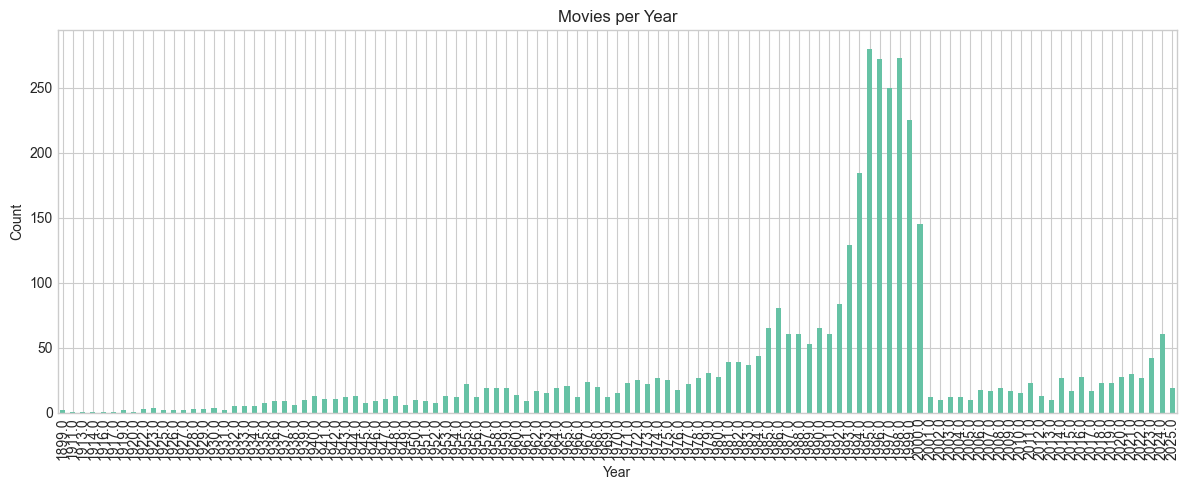

In [15]:
# 📅 Release Year Distribution
plt.figure(figsize=(12,5))
df['release_year'].value_counts().sort_index().plot(kind='bar')
plt.title("Movies per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

**Insights**:

- A sharp increase in the number of movies occurs between **1990 and 2000**, suggesting a more complete dataset for that period.
- After the 2000s, there is a **noticeable drop** — likely** not due to decreased productio**n, but rather a **bias in the dataset’s coverage**.
- It’s plausible that the TMDb enrichment pipeline or the original MovieLens set is **biased toward late 20th century films**, and may **underrepresent newer or obscure content.**

In order to have a better comprehension of the movie production per unit of time, we decided to group them by decade and visualize a new more detailed plot.

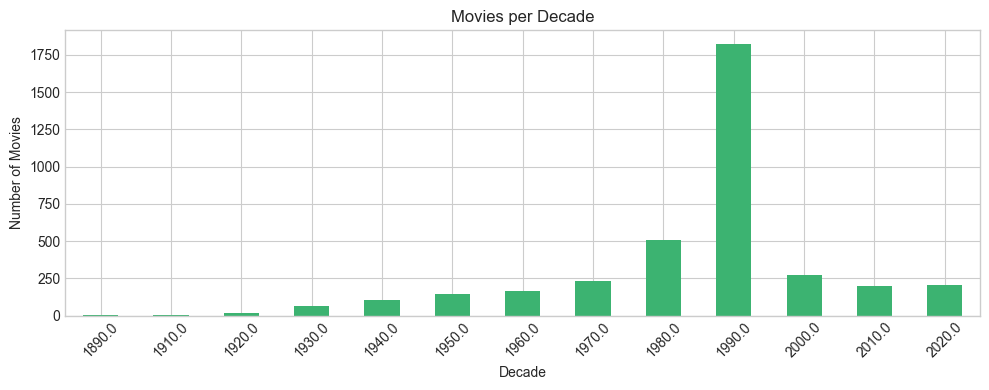

In [16]:
# Create decade bins
df['release_decade'] = (df['release_year'] // 10) * 10

# Plot
plt.figure(figsize=(10,4))
df['release_decade'].value_counts().sort_index().plot(kind='bar', color='mediumseagreen')
plt.title("Movies per Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation**:

- This view gives a clearer trend of long-term evolution in movie production.
- It reduces visual clutter and allows for easier comparison across eras.
- Consider combining this with metadata like **genre trends per decade** for deeper insights.

### 🧾 Summary Insights

- ✅ Applying a logarithmic transformation to `popularity` exposed more structure in the distribution and reduced the dominance of outliers, enabling better understanding and modeling.
- ✅ Grouping movies by `release_decade` instead of raw `release_year` eliminated visual clutter, highlighted long-term production trends, and revealed dataset coverage biases.

These two preprocessing steps enhanced interpretability and should be considered for feature engineering in the modeling pipeline. Additional inspection of `vote_average` (filtered by `vote_count`) and `overview_length` may further refine insights.

### 🏆 4.6 Top Rated / Popular Movies

To further explore standout content, we highlight:

- The **Top 5 highest-rated** movies based on `vote_average`
- The **Top 5 most popular** movies based on the `popularity` score

This helps identify outliers and anchor points in both distributions.

#### 🎬 Top Rated Movies

We sort by `vote_average` (bounded [0, 10]) and select the top 5 entries:

In [17]:
# 🧾 Top Rated / Popular Movies
print("\n🎬 Top 5 by Rating:")
df[['title', 'vote_average']].sort_values(by='vote_average', ascending=False).head()


🎬 Top 5 by Rating:


,title,vote_average
2844,"Princess Mononoke, The (Mononoke Hime) (1997)",10.0
2457,Open Your Eyes (Abre los ojos) (1997),10.0
2979,"Three Ages, The (1923)",10.0
707,"Rock, The (1996)",10.0
1296,Blood & Wine (1997),10.0


💡 *Note: All of them scored a perfect 10 — indicating either exceptional quality or limited ratings with strong consensus.*

#### 🔥 Top Popular Movies

Now we sort by `popularity`, which reflects broader engagement signals:

In [18]:
# 🏆 Top 5 by Popularity
print("\n🔥 Top 5 by Popularity:")
df[['title', 'popularity']].sort_values(by='popularity', ascending=False).head()


🔥 Top 5 by Popularity:


,title,popularity
630,Mission: Impossible (1996),267.7424
2601,"Mission, The (1986)",267.7424
2571,"Wood, The (1999)",173.6553
3238,Final Destination (2000),89.1441
354,"Lion King, The (1994)",84.0314


*📌 Note: Popularity is often dominated by mainstream or trending releases.*

## 📌 Final Notes and Export

After completing our exploratory data analysis, we gained several insights:

- The dataset includes a wide variety of movies, with a heavy presence of Drama and Comedy genres.
- Popularity scores are heavily skewed, requiring transformation or normalization in downstream modeling.
- The number of movies increased sharply in the 1990s, but the dataset underrepresents recent releases.
- Vote averages tend to be clustered around 6–7, suggesting limited variance in rating behavior.

We have engineered relevant features such as:

- `release_year`
- `n_genres`
- `overview_length`

and may engineer some others like

- np.log1p(`popularity`)
- `release_decade`

These transformations enhance the modeling potential and will be carried over to the modeling pipeline.

In [19]:

# 💾 Save cleaned dataset (optional)
df.to_csv("../data/processed/enriched_movies_clean.csv", index=False)
print("✅ Cleaned dataset exported.")


✅ Cleaned dataset exported.


The cleaned and feature-enhanced dataset was exported to:

```bash
/data/processed/enriched_movies_clean.csv
```

✅ Ready for modeling!